## Group 8 Final Project
#### Chia-Jo Chen: chiajoc@uci.edu
#### Dong Wook Kim: kimdw7@uci.edu
#### Edward Shih-Yu Chung: chunges2@uci.edu
#### Kirti Swapnil Bhalgat: kbhalgat@uci.edu
#### Marielle S. Dela Cruz: marielld@uci.edu 

In [1]:
# import library
import numpy as np
import pandas as pd
import re
import math as m
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## Part 2 Data Analysis
### 1. Game Activity

In [2]:
# import data -- users activity
game_activity = pd.read_csv("SteamDF_pruned1.csv")
game_activity.drop(["Unnamed: 0"],inplace=True,axis=1)
game_activity["DateTime"] = pd.to_datetime(game_activity["DateTime"], utc=False)
game_activity.head(2)

,DateTime,730,570,578080,945360,252950,271590,359550,440,252490,...,255710,275850,239140,236850,444200,787860,440900,227300,761890,601510
0,2019-01-01,577546.0,630381.0,986759.0,18.0,61006.0,105875.0,115245.0,64808.0,58273.0,...,18384.0,7720.0,8733.0,22209.0,17548.0,22950.0,10437.0,36904.0,435.0,7364.0
1,2019-01-02,617293.0,653543.0,988726.0,16.0,60990.0,104300.0,116029.0,58697.0,51449.0,...,16162.0,6257.0,8637.0,20592.0,18867.0,21688.0,9383.0,36779.0,444.0,7646.0


In [3]:
# import data -- information
game_info = pd.read_csv("top100_df.csv")
game_info.head(2)

,app_ID,name,developer,publisher,positive,negative,owners,avg_forever,avg_2wk,median_forever,median_2wk,price,initial_price,discount,ccu
0,570,Dota 2,Valve,Valve,1176184,215691,"100,000,000 .. 200,000,000",32301,1722,1221,735,0,0,0,534732
1,730,Counter-Strike: Global Offensive,"Valve, Hidden Path Entertainment",Valve,4317858,593046,"100,000,000 .. 200,000,000",25424,820,6289,359,0,0,0,870470


In [4]:
# Data description
game_info[["avg_forever","avg_2wk","median_forever","median_2wk","price","initial_price","discount","ccu"]].describe()

,avg_forever,avg_2wk,median_forever,median_2wk,price,initial_price,discount,ccu
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,4021.950000,381.640000,903.240000,317.370000,1001.860000,1064.360000,1.550000,35461.610000
std,6007.659379,546.889543,1642.926258,582.191049,1170.515427,1251.873969,10.910448,109763.058339
min,14.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,734.750000,16.750000,163.500000,16.750000,0.000000,0.000000,0.000000,647.000000
50%,1512.000000,176.500000,343.500000,173.000000,774.000000,799.000000,0.000000,4030.500000
75%,5074.250000,490.250000,872.000000,409.000000,1499.000000,1624.000000,0.000000,21719.250000
max,32301.000000,3062.000000,12141.000000,5057.000000,5999.000000,5999.000000,80.000000,870470.000000


#### Extracting Data Before Pandemic (Jan 2019 ~ Jan 2020) & After Pandemic (Feb 2020~Nov 2020)

In [5]:
# Data before Pandemic - Jan 2019 to Jan 2020 (Time before Pandemic)
before_pandemic = game_activity[(game_activity["DateTime"] >= "2019-01-01") & (game_activity["DateTime"] < "2020-01-31")]

# Data after pandemic - Feb 2020 to Nov 2020 (Pandemic began)
after_pandemic = game_activity[(game_activity["DateTime"] >= "2020-02-01")]

# app_id before and after
app_id_b = before_pandemic[['730', '570', '578080', '945360', '252950', '271590', '359550', '440', '252490', '346110', '381210', '230410', '218620', '582010', '289070', '105600', '251570', '550', '306130', '236390', '304930', '4000', '238960', '322330', '394360', '377160', '39210', '594570', '8930', '281990', '386360', '582660', '294100', '438100', '489830', '292030', '413150', '435150', '291550', '242760', '255710', '275850', '239140', '236850', '444200', '787860', '440900', '227300', '761890','601510']]
app_id_a = after_pandemic[['730', '570', '578080', '945360', '252950', '271590', '359550', '440', '252490', '346110', '381210', '230410', '218620', '582010', '289070', '105600', '251570', '550', '306130', '236390', '304930', '4000', '238960', '322330', '394360', '377160', '39210', '594570', '8930', '281990', '386360', '582660', '294100', '438100', '489830', '292030', '413150', '435150', '291550', '242760', '255710', '275850', '239140', '236850', '444200', '787860', '440900', '227300', '761890','601510']]

#### SteamDB - 50 Games Activity (Before vs After)

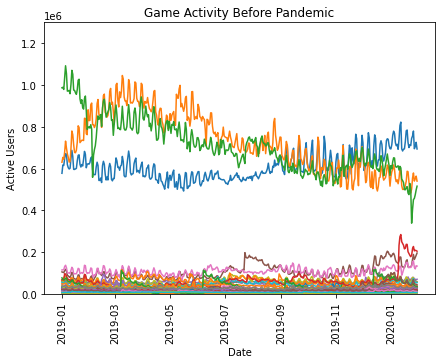

In [6]:
# 50 Games Activity Before Pandemic
plt.figure(figsize=(7,5))
plt.plot(before_pandemic["DateTime"], app_id_b)
plt.title("Game Activity Before Pandemic")
plt.xlabel("Date")
plt.ylabel("Active Users")
plt.xticks(rotation=90)
plt.axis([None, None, 0, 1300000])
plt.savefig("Game Activity Before Pandemic.png")

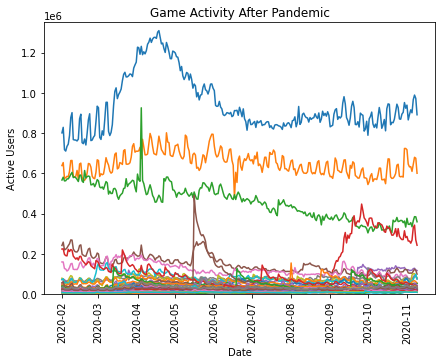

In [7]:
# 50 Games Activity After Pandemic
plt.figure(figsize=(7,5))
plt.plot(after_pandemic["DateTime"], app_id_a)
plt.title("Game Activity After Pandemic")
plt.xlabel("Date")
plt.ylabel("Active Users")
plt.xticks(rotation=90)
plt.axis([None, None, 0, 1350000])
plt.savefig("Game Activity After Pandemic.png")

#### Top 5 Games (Jan 2019 ~ Nov 2020)

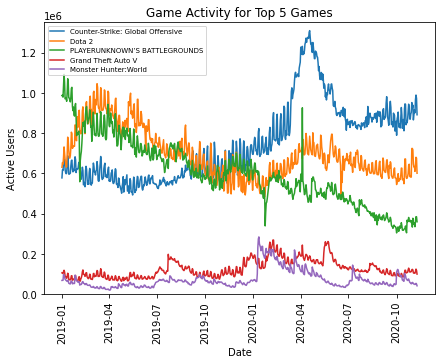

In [8]:
specific_id = game_activity[["730", "570", "578080","271590", "582010"]]

plt.figure(figsize=(7,5))
for i in specific_id:
    plt.plot(game_activity["DateTime"], specific_id[i])
    plt.title("Game Activity for Top 5 Games")
    plt.xlabel("Date")
    plt.ylabel("Active Users")
    plt.gca().legend(("Counter-Strike: Global Offensive","Dota 2","PLAYERUNKNOWN’S BATTLEGROUNDS","Grand Theft Auto V","Monster Hunter:World"),loc="upper left",fontsize="x-small")
    plt.xticks(rotation=90)
    plt.axis([None, None, 0, 1350000])
    plt.savefig("Game Activity for Top 5 Games")

#### Game: Among Us

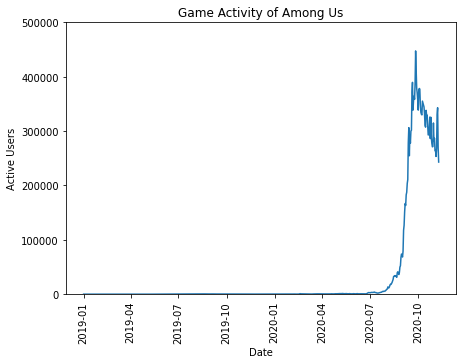

In [9]:
Among_us = game_activity[["945360"]]
plt.figure(figsize=(7,5))
plt.plot(game_activity["DateTime"], Among_us)
plt.title("Game Activity of Among Us")
plt.xlabel("Date")
plt.ylabel("Active Users")
plt.xticks(rotation=90)
plt.axis([None, None, 0, 500000])
plt.savefig("Among Us")

#### Game: Among Us & Terraria

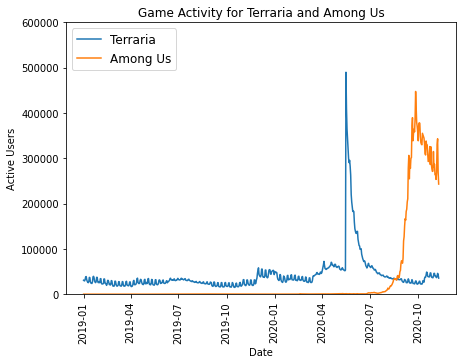

In [10]:
Terr_Among = game_activity[['105600', '945360']]
plt.figure(figsize=(7,5))
for i in Terr_Among:
    plt.plot(game_activity["DateTime"], Terr_Among[i])
    plt.title("Game Activity for Terraria and Among Us")
    plt.xlabel("Date")
    plt.ylabel("Active Users")
    plt.xticks(rotation=90)
    plt.axis([None, None, 0, 600000])
    plt.gca().legend(("Terraria","Among Us"),fontsize="large", loc="upper left")
    plt.savefig("Game Activity for Terraria and Among Us")

## Part 3 Business Analysis

### SteamDB 
#### 1. Average Concurrent Users and Median Concurrent Users
#### 2. Average Revenue - Before Pandemic (Jan 2019 ~ Jan 2020) & During Pandemic (Feb 2020~Nov 2020)

### Before Pandemic (Jan 2019 ~ Jan 2020)

In [28]:
# Before Pandemic - extracting data from game activity
for i in app_id_b:
    average_ccu_b=before_pandemic.mean().round()
Revenue_2019=average_ccu_b.to_frame()
Revenue_2019.reset_index(level=0, inplace=True)
Revenue_2019.columns = ["app_ID", "average ccu"] 

## median_ccu 2019
for i in app_id_b:
    median_ccu_b=before_pandemic.median().round()
median_ccu_b = median_ccu_b.to_frame()
median_ccu_b.reset_index(level=0, inplace=True)
median_ccu_b.columns = ["app_ID", "median ccu"] 
Revenue_2019["median ccu"] = median_ccu_b["median ccu"]

/Users/chiajochen/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/chiajochen/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  # Remove the CWD from sys.path while we load stuff.


#### Calculation for Average and Median Concurrent Users

In [29]:
# Calculation for Concurrent Users
average_ccu = Revenue_2019["average ccu"].sum()
print("Daily Average Concurrent Users:", average_ccu)

median_ccu = Revenue_2019["median ccu"].sum()
print("Daily Median Concurrent Users:", median_ccu)

Daily Average Concurrent Users: 3291769.0
Daily Median Concurrent Users: 3178021.0


In [31]:
# Before Pandemic - extracting data from game_info & merge two dataframe together
df = game_info.loc[game_info["app_ID"].isin(app_id_b)]
df_1=df[["app_ID", "name", "price", "initial_price"]]

# csv
df_1.to_csv('df_1.csv')
df_1 = pd.read_csv('df_1.csv', index_col=0)

#csv
Revenue_2019.to_csv('Revenue_2019.csv')
Revenue_2019 = pd.read_csv('Revenue_2019.csv', index_col=0)

# merge
Revenue_2019 = pd.merge(Revenue_2019,df_1, on="app_ID")

# transform price
Revenue_2019["price"] = Revenue_2019["price"].div(100).round(2)
Revenue_2019["initial_price"] = Revenue_2019["initial_price"].div(100).round(2)
Revenue_2019["average revenue"] = pd.DataFrame([(Revenue_2019["price"])*0.3*(Revenue_2019["average ccu"])]).T
Revenue_2019["median revenue"] = pd.DataFrame([(Revenue_2019["price"])*0.3*(Revenue_2019["median ccu"])]).T
Revenue_2019

,app_ID,average ccu,median ccu,name,price,initial_price,average revenue,median revenue
0,730,610533.0,595994.0,Counter-Strike: Global Offensive,0.00,0.00,0.000,0.000
1,570,730860.0,720737.0,Dota 2,0.00,0.00,0.000,0.000
2,578080,709824.0,693723.0,PLAYERUNKNOWN'S BATTLEGROUNDS,29.99,29.99,6386286.528,6241425.831
3,945360,172.0,157.0,Among Us,4.99,4.99,257.484,235.029
4,252950,57102.0,56185.0,Rocket League,0.00,0.00,0.000,0.000
5,271590,107784.0,98395.0,Grand Theft Auto V,29.99,29.99,969732.648,885259.815
6,359550,108014.0,107033.0,Tom Clancy's Rainbow Six Siege,19.99,19.99,647759.958,641876.901
7,440,57311.0,55855.0,Team Fortress 2,0.00,0.00,0.000,0.000
8,252490,61752.0,60975.0,Rust,39.99,39.99,740838.744,731517.075
9,346110,48682.0,47330.0,ARK: Survival Evolved,9.99,49.99,145899.954,141848.010


#### Calculation for Monthly Revenue

In [33]:
# Calculation for Revenue
total_revenue = Revenue_2019["average revenue"].sum()/13
print("Monthly revenue of Steam:", total_revenue.round(2))

Monthly revenue of Steam: 849090.59


### During Pandemic (Feb 2020~Nov 2020)

In [34]:
# After Pandemic - extracting data from game activity
## average_ccu 2020
for i in app_id_a:
    average_ccu_a=after_pandemic.mean().round()
Revenue_2020=average_ccu_a.to_frame()
Revenue_2020.reset_index(level=0, inplace=True)
Revenue_2020.columns = ["app_ID", "average ccu"] 

## median_ccu 2020
for i in app_id_a:
    median_ccu_a=after_pandemic.median().round()
median_ccu_a = median_ccu_a.to_frame()
median_ccu_a.reset_index(level=0, inplace=True)
median_ccu_a.columns = ["app_ID", "median ccu"] 
Revenue_2020["median ccu"] = median_ccu_a["median ccu"]
Revenue_2020

/Users/chiajochen/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  after removing the cwd from sys.path.
/Users/chiajochen/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  # This is added back by InteractiveShellApp.init_path()


,app_ID,average ccu,median ccu
0,730,938396.0,892104.0
1,570,649561.0,647060.0
2,578080,460155.0,470307.0
3,945360,77399.0,1038.0
4,252950,81742.0,71144.0
5,271590,150207.0,142346.0
6,359550,123843.0,114681.0
7,440,77912.0,77920.0
8,252490,73314.0,71400.0
9,346110,78128.0,71483.0


#### Calculation for Average and Median Concurrent Users

In [35]:
# Calculation for Average and Median Concurrent Users
average_ccu = Revenue_2020["average ccu"].sum()
print("Daily Average Concurrent Users:", average_ccu)

median_ccu = Revenue_2020["median ccu"].sum()
print("Daily Median Concurrent Users:", median_ccu)

Daily Average Concurrent Users: 3814928.0
Daily Median Concurrent Users: 3588144.0


In [36]:
# After Pandemic - extracting data from game_info & merge two dataframe together
df_2 = game_info.loc[game_info["app_ID"].isin(app_id_a)]
df_2=df_2[["app_ID", "name", "price", "initial_price"]]


# csv
df_2.to_csv('df_2.csv')
df_2 = pd.read_csv('df_2.csv', index_col=0)

#csv
Revenue_2020.to_csv('Revenue_2020.csv')
Revenue_2020 = pd.read_csv('Revenue_2020.csv', index_col=0)

# merge
Revenue_2020 = pd.merge(Revenue_2020,df_2, on="app_ID")

# add 
Revenue_2020["price"] = Revenue_2020["price"].div(100).round(2)
Revenue_2020["initial_price"] = Revenue_2020["initial_price"].div(100).round(2)
Revenue_2020["average revenue"] = pd.DataFrame([(Revenue_2020["price"])*0.3*(Revenue_2020["average ccu"])]).T
Revenue_2020["median revenue"] = pd.DataFrame([(Revenue_2020["price"])*0.3*(Revenue_2020["median ccu"])]).T

#### Calculation for Monthly Revenue

In [37]:
# Calculation for Monthly Revenue
total_revenue = Revenue_2020["average revenue"].sum()/10
print("Monthly revenue of Steam:", total_revenue.round(2))

Monthly revenue of Steam: 1036392.16


### 2. Game Price - Average and Median price of each game

In [44]:
# Game Price
average_price = Revenue_2019["price"].mean()
print("Average Price:", round(average_price,2))

median_price = Revenue_2019["price"].median()
print("Median Price:", median_price)

Average Price: 12.88
Median Price: 9.99


### Appendix

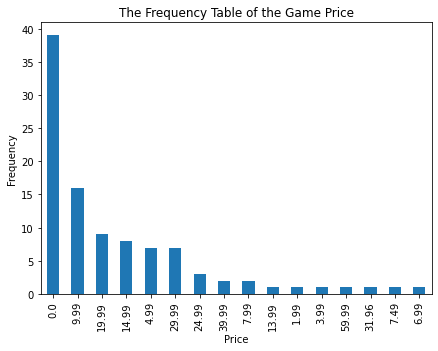

In [45]:
# Games' Price Frequency Table
plt.figure(figsize=(7,5))
game_info["price"] = game_info["price"].div(100).round(2)
game_info["price"].value_counts().plot.bar()
plt.title("The Frequency Table of the Game Price")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.savefig("Price and Frequency")